<a href="https://colab.research.google.com/github/Zarate73/Simulaci-n-/blob/main/Transformada_Inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de la transformada inversa.

$\textbf{Teorema:}$ Sea $u \sim U(0,1)$; para cualquier función de distribución continua $F$ invertible , la variable aleatoria $X=F^{-1}(u)$ tiene distribución $F$.


En gral. el método funciona de la siguiente manera:

* Verificar si $f(x)$ es una fdp
$$ * f(x)\geq 0.$$
$$ * \int\limits^{∞}_{-∞} f(s)ds. $$

* Obtener la función de distribución acumulativa, es decir $F(x)$.
* Igualar a una variable $u \sim U(0,1)$  y despejar $x$.


### Ejemplo: Obten la distribucion triangular en el intervalo $(a,b)$ utilizando el método de la transformada inversa.


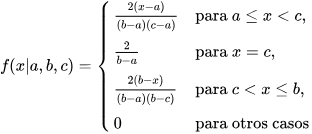

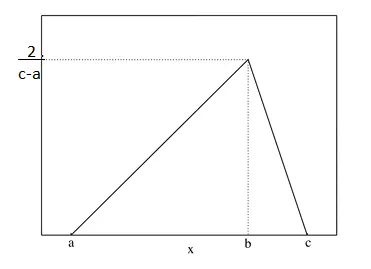


Tiene una función de densidad acumulada.

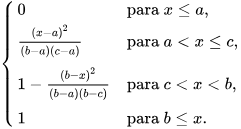




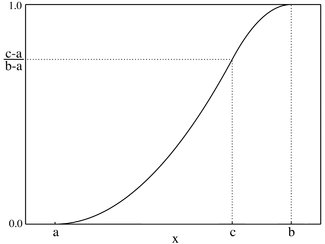





De la función de densidad hay que igualar una $v.a \sim U(0,1)$, es decir:

$$\frac{(x-a)^{2}}{(b-a)(c-a)}=u, x\in(a,c] $$
despejando a $x$
$$(x-a)^{2}=(b-a)(c-a)u ⟺ x-a=\sqrt{(b-a)(c-a)u} ⟺     x=\sqrt{(b-a)(c-a)u} + a$$

Ahora para $(c,b]$
$$1-\frac{(b-x)^{2}}{(b-a)(b-c)}=u ⟺ x=b-\sqrt{(1-u)(b-a)(b-c)} $$

Notemos que en la gráfica de la acumulativa hay un valor $\frac{c-a}{b-a}$, este valor es importante ya que en base a este mapearemos los números la función.

### $\textbf{Código:}$

In [4]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
def distriangular(a,b,c,n):
  C=[]
  d1=(b-a) # Valores utilizados en el cálculo de la distribución
  d2=(c-a)
  d3=(c-b)

  for i in range(n):
    x=rd.random() #Generación del número aleatorio entre 0 y 1
    if x<=0: # Condición para cubrir todo los demas datos
      U = 0
      C.append(U)
    elif 0 < x < d1/d2: # condion con el valor mapeado (c-a)/(b-a)
      U = np.sqrt(d1 * d2 * x) + a
      C.append(U)

    elif d1/d2<x<1:
      k=-(x-1)
      U=-np.sqrt(k*d2*d3)+c
      C.append(U)
    elif x>=1:
      U=1
      C.append(U)


  return C

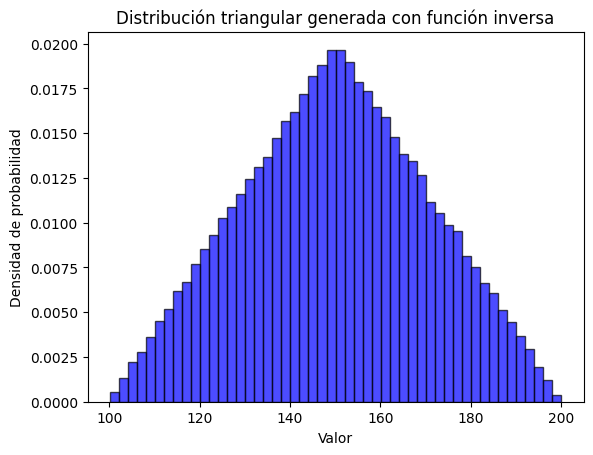

In [6]:
G=distriangular(100,150,200,90000)

# Crear histograma para visualizar la distribución
plt.hist(G, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución triangular generada con función inversa')

# Mostrar la gráfica
plt.show()

In [7]:
def cdf(muestra): #Programa auxiliar para grafica la función de densidad acumulada.

  n=len(muestra)
  x=np.sort(muestra)
  y = np.arange(1, n + 1) / n
  return x,y

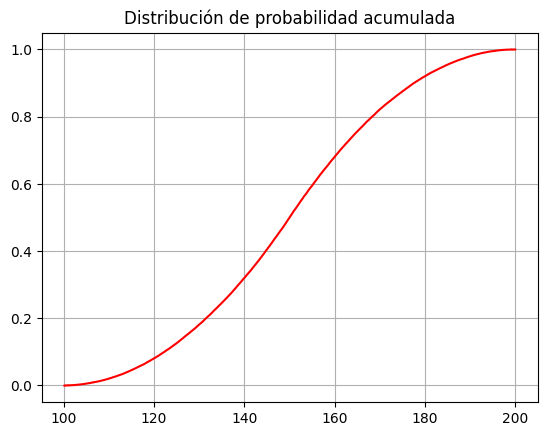

In [11]:
X, Y=cdf(G)
# Agregar etiquetas y título

plt.title('Distribución de probabilidad acumulada')

plt.step(X,Y,"r",)
plt.grid(True)